In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("diabetes.csv")
df=data.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


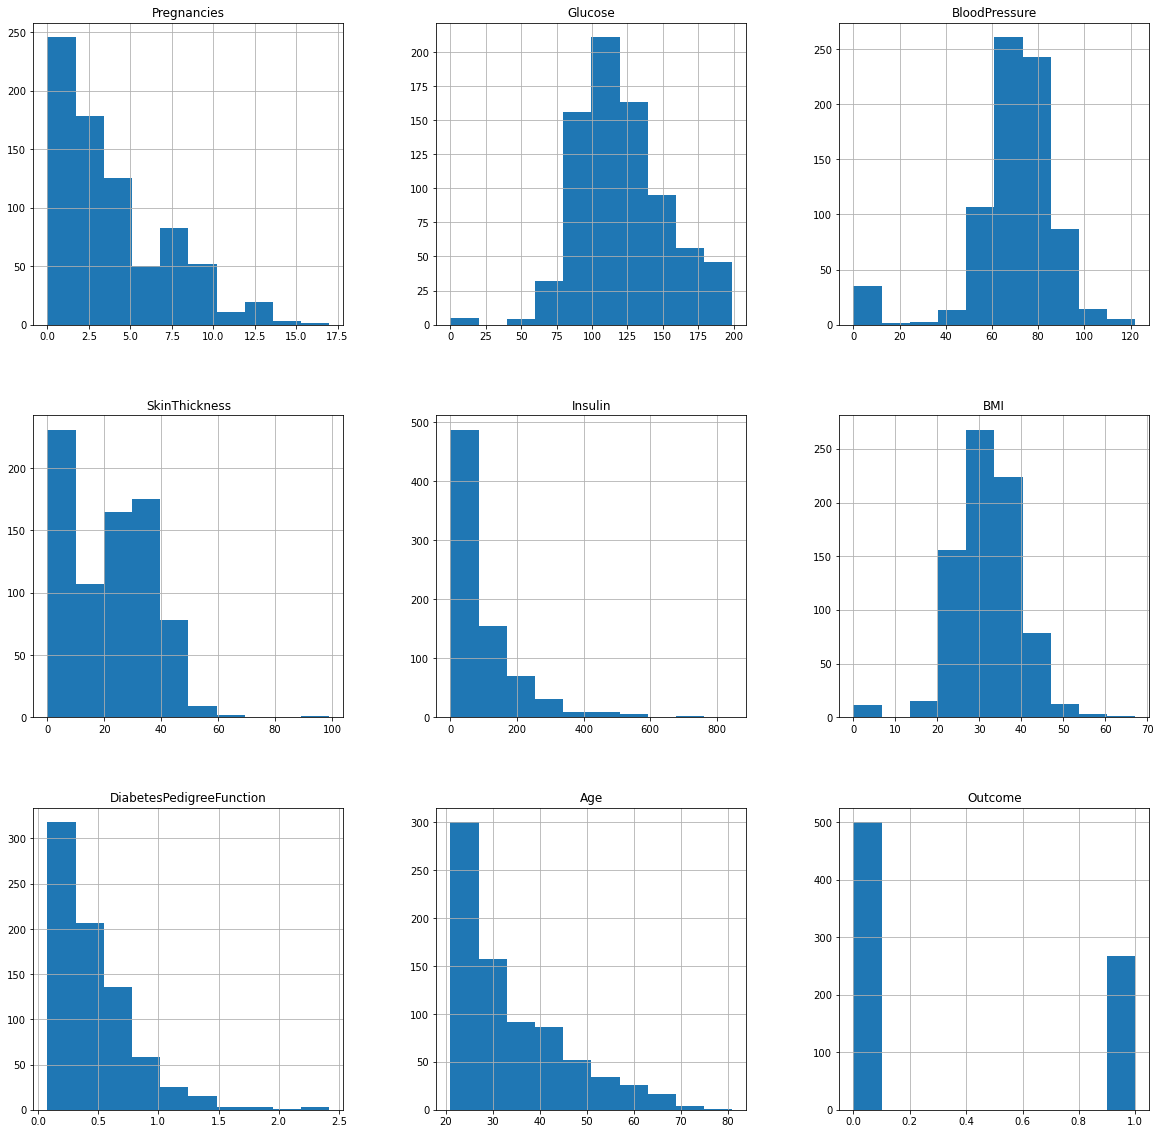

In [27]:
p = df.hist(figsize = (20,20))

In [7]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df.groupby("Outcome").mean()
#insulin ve Glucose arasındaki fark gözüme çarptı.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<AxesSubplot:>

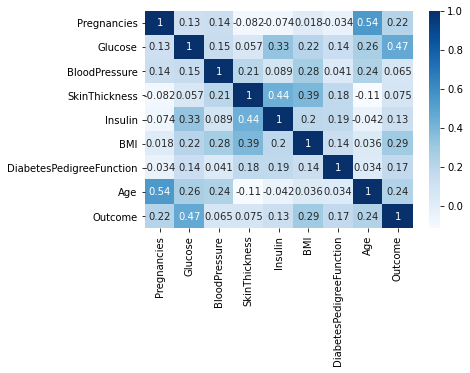

In [9]:
import seaborn as sns
sns.heatmap(df.corr() , cmap="Blues" , annot=True)

In [10]:
X = df.drop(columns="Outcome" , axis=1)
Y = df["Outcome"] 

In [11]:
print(X[0:4])
print("****************************************************************")
print(Y[0:4])

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
****************************************************************
0    1
1    0
2    1
3    0
Name: Outcome, dtype: int64


StandartScaler

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()    # 0 ile 1 aralığında
#sc.fit(X)
#standartize_data = sc.transform(X)
#or 
#sc.fit_transform(X) both the same
X= sc.fit_transform(X)
print(X[0:4])

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]]


In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,Y , test_size=0.33 , random_state=42)

In [14]:
from sklearn import svm
svm = svm.SVC(kernel = "linear")
svm.fit(X_train,  y_train)

SVC(kernel='linear')

    Model Evulation

In [15]:
from sklearn.metrics import accuracy_score

In [23]:
y_pred_train = svm.predict(X_train)
X_train_acc = accuracy_score(y_train , y_pred_train)
print("Train's accuracy : " , X_train_acc)

Train's accuracy :  0.7821011673151751


In [24]:
y_pred_test = svm.predict(X_test)
X_test_acc = accuracy_score(y_test , y_pred_test)
print("Test's accuracy : " , X_test_acc)
# y_pred = model.predict(X_train , y_train)
#accuracy(y_pred , y_test) #nott

Test's accuracy :  0.7519685039370079


In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)
pd.crosstab(y_test, y_pred_test , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,138,30,168
1,33,53,86
All,171,83,254


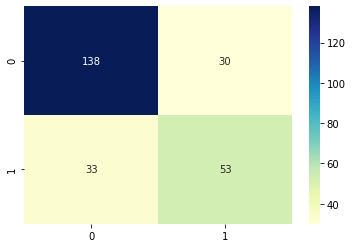

In [34]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       168
           1       0.64      0.62      0.63        86

    accuracy                           0.75       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.75      0.75       254



In [36]:
my_data = [[6,148,72,35,0,33.6,0.627,50]]
x=svm.predict(my_data) 
x
#!!Correct

array([1], dtype=int64)